# Text data mining

* dataset used for this exercise can be downloaded from [here](https://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups)

In [77]:
rm(list=ls())
library(tm)

In [78]:
src <- "/home/jovyan/data/SDM/20_newsgroups/"
docs <- VCorpus(DirSource(directory=src, encoding='utf-8', pattern='^.*3$', recursive = TRUE))

In [79]:
docs <- tm_map(docs, content_transformer(tolower))   
docs <- tm_map(docs, removeNumbers)   
docs <- tm_map(docs, removeWords, stopwords("english"))   
docs <- tm_map(docs, removePunctuation)   
docs <- tm_map(docs, stemDocument)

In [80]:
head(summary(docs))

      Length Class             Mode
51123 2      PlainTextDocument list
51133 2      PlainTextDocument list
51143 2      PlainTextDocument list
51153 2      PlainTextDocument list
51163 2      PlainTextDocument list
51173 2      PlainTextDocument list

In [81]:
dtm <- DocumentTermMatrix(docs, control=list(wordLengths=c(3,40)))

In [82]:
nrow(dtm)
ncol(dtm)
head(colnames(dtm))
head(rownames(dtm))

[1] 2007

[1] 36161

[1] "aaa"                    "aaaa"                   "aaaahhh"               
[4] "aabengaltigrorg"        "aac"                    "aacapricorntaiselcomtw"

[1] "51123" "51133" "51143" "51153" "51163" "51173"

In [83]:
dtms <- removeSparseTerms(dtm, 0.95)

In [84]:
library(lsa)

distances <- cosine(t(as.matrix(dtms)))

In [85]:
library(fpc)
library(cluster)

kfit <- pam(distances, k=20, diss=TRUE)
clustering <- kfit$cluster

In [86]:
groups <- DirSource(directory=src, encoding='utf-8', pattern='^.*3$', recursive = TRUE)
groups <- c(unlist(groups, recursive=FALSE))
groups <- gsub('/home/jovyan/data/SDM/20_newsgroups/([a-zA-Z.-]+)/\\d+', '\\1', groups)[-(1:5)]

In [89]:
clustering_result <- cbind(clustering, groups)
#clustering_result

In [90]:
library(dplyr)
cluster_result_df <- as.data.frame(clustering_result)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



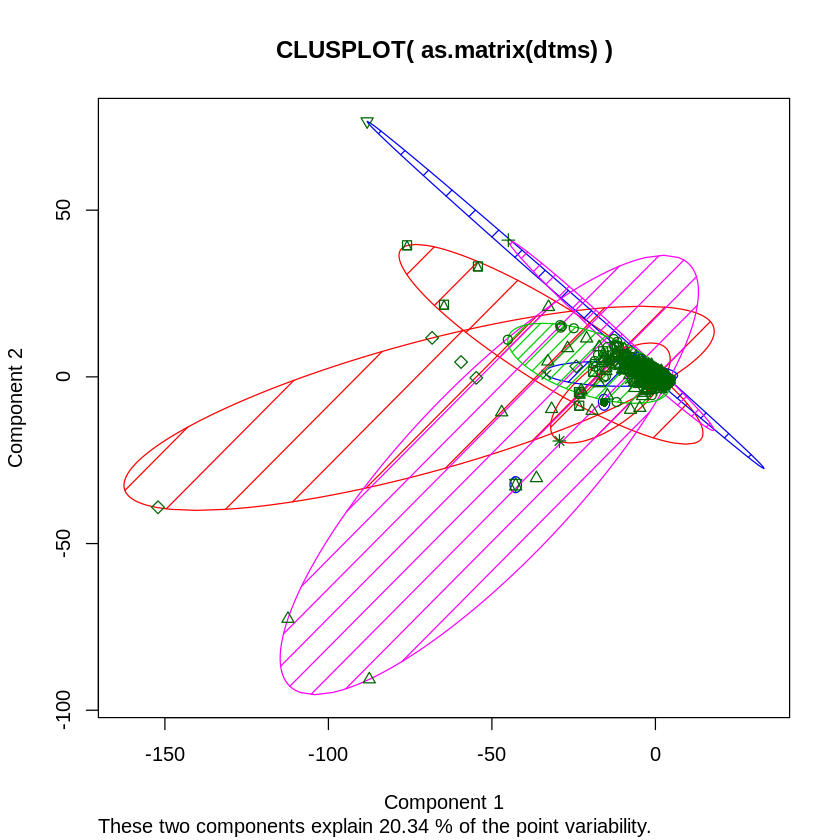

In [92]:
clusplot(as.matrix(dtms), kfit$cluster, color=T, shade=T, labels=0, lines=0)